# Fish market dataset
This contains records of 7 different species of fish in fish market sales. 
- Link to dataset: https://www.kaggle.com/datasets/aungpyaeap/fish-market

In [1]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load data into a dataframe

fish = pd.read_csv("archive_fish/Fish.csv")

In [3]:
#view dataset
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
fish.duplicated().sum()

0

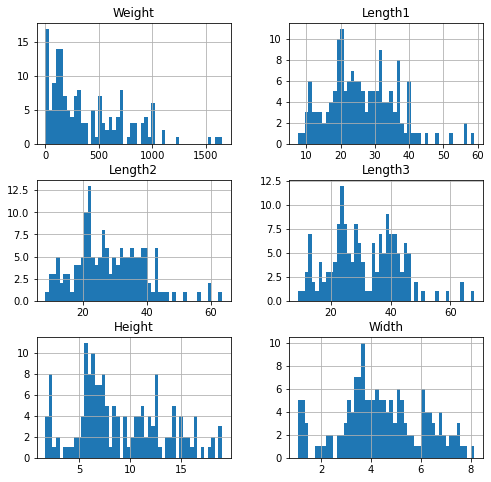

In [6]:
fish.hist(bins = 50, figsize = (8,8))
plt.show()

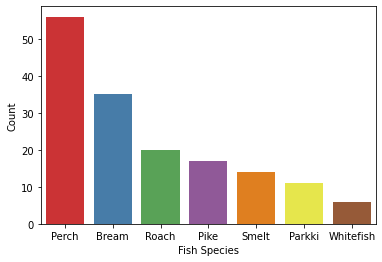

In [7]:
sb.countplot(x = 'Species', data = fish, palette = 'Set1', order = fish['Species'].value_counts().index)

plt.xlabel('Fish Species')
plt.ylabel('Count');


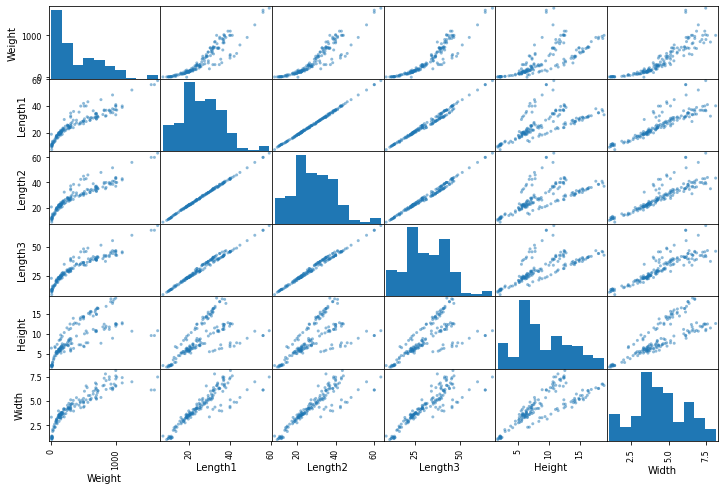

In [8]:
from pandas.plotting import scatter_matrix 

attr = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

scatter_matrix(fish[attr], figsize = (12,8));

In [9]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [10]:
#getting the input and labels
x = fish.drop(['Species'], axis = 1)
y = fish['Species']

# Using Scikit-learn

In [11]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.svm import SVC
#instantiate linear SVC object
model = SVC(kernel = 'linear', C = 1)

In [13]:
#train the linear SVC Classifier with training data
model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [14]:
#make predictions
svm_pred = model.predict(x_test)
print('Predictions:\n', svm_pred)
print("\n")
print('Labels:\n', list(y_test))

Predictions:
 ['Perch' 'Smelt' 'Pike' 'Roach' 'Perch' 'Bream' 'Smelt' 'Roach' 'Perch'
 'Pike' 'Bream' 'Whitefish' 'Bream' 'Parkki' 'Bream' 'Bream' 'Perch'
 'Perch' 'Perch' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Perch'
 'Perch' 'Roach' 'Smelt' 'Smelt' 'Pike' 'Perch']


Labels:
 ['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch', 'Bream', 'Smelt', 'Roach', 'Perch', 'Pike', 'Bream', 'Whitefish', 'Bream', 'Parkki', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Perch', 'Perch', 'Whitefish', 'Smelt', 'Smelt', 'Pike', 'Perch']


In [16]:
#check accuracy
model.score(x_test, y_test)

0.9375

# Using Tensorflow

In [18]:
import tensorflow as tf
if tf.__version__ == '2.11.0':
    print('do nothing')
else:
    !pip install tensorflow

do nothing


import tensorflow as tf

#start graph session
sess = tf.compat.v1.Session()

#classify data into features and labels
x_val = np.array([[x[1:7]] for x in fish.to_numpy()])
y_val = np.array([1 if y == 'Bream' else -1 for y in fish.Species])

In [19]:
fish['Species'] = fish['Species'].apply(lambda x: 1 if x =="Bream" else 0)
fish['Species'].sample(10)

73     0
104    0
155    0
25     1
30     1
45     0
131    0
2      1
146    0
157    0
Name: Species, dtype: int64

In [33]:
x_data = fish[['Weight','Length1','Length2','Length3','Height','Width']]
y_data = fish[['Species']]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

## Neural network model

<b>relu</b> is a commonly used linear activation function <br>
<b>sigmoid</b> is used as in the last layer because we're dealing with binary classification

In [37]:
model = Sequential()
#first layer to the model with 8 neurons
model.add(Dense(8, input_dim = len(x_data.loc[0, :]), activation = 'relu'))#only the first layer of neurons need to receive the input

#this layer does not need an input
model.add(Dense(4, activation = 'relu')) 

#sigmoid because it is a classification problem and 
#only one neuron is needed here because we only need to predict one value at the output
model.add(Dense(1, activation = 'sigmoid')) 

In [38]:
#to see how the model looks like
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [39]:
#compile the model
model.compile(loss ='binary_crossentropy', optimizer ='rmsprop', metrics = ['accuracy'])

In [40]:
#train the model
model.fit(X_train,Y_train, epochs = 256, verbose = 1)

Epoch 1/256
4/4 [==============================] - 4s 32ms/step - loss: 26.7446 - accuracy: 0.8031
Epoch 2/256
4/4 [==============================] - 0s 8ms/step - loss: 24.1913 - accuracy: 0.8031
Epoch 3/256
4/4 [==============================] - 0s 22ms/step - loss: 22.4184 - accuracy: 0.8031
Epoch 4/256
4/4 [==============================] - 0s 18ms/step - loss: 20.9275 - accuracy: 0.8031
Epoch 5/256
4/4 [==============================] - 0s 28ms/step - loss: 19.5707 - accuracy: 0.8031
Epoch 6/256
4/4 [==============================] - 0s 23ms/step - loss: 18.3134 - accuracy: 0.8031
Epoch 7/256
4/4 [==============================] - 0s 18ms/step - loss: 17.1377 - accuracy: 0.8031
Epoch 8/256
4/4 [==============================] - 0s 12ms/step - loss: 15.9911 - accuracy: 0.8031
Epoch 9/256
4/4 [==============================] - 0s 15ms/step - loss: 14.8811 - accuracy: 0.8031
Epoch 10/256
4/4 [==============================] - 0s 14ms/step - loss: 13.8313 - accuracy: 0.8031
Epoch 11/2

4/4 [==============================] - 0s 20ms/step - loss: 0.3094 - accuracy: 0.8268
Epoch 84/256
4/4 [==============================] - 0s 99ms/step - loss: 0.3277 - accuracy: 0.8031
Epoch 85/256
4/4 [==============================] - 0s 35ms/step - loss: 0.3045 - accuracy: 0.8425
Epoch 86/256
4/4 [==============================] - 0s 12ms/step - loss: 0.3109 - accuracy: 0.8346
Epoch 87/256
4/4 [==============================] - 0s 10ms/step - loss: 0.3110 - accuracy: 0.8268
Epoch 88/256
4/4 [==============================] - 0s 10ms/step - loss: 0.3127 - accuracy: 0.8346
Epoch 89/256
4/4 [==============================] - 0s 10ms/step - loss: 0.3091 - accuracy: 0.8268
Epoch 90/256
4/4 [==============================] - 0s 17ms/step - loss: 0.3093 - accuracy: 0.8268
Epoch 91/256
4/4 [==============================] - 0s 12ms/step - loss: 0.3084 - accuracy: 0.8346
Epoch 92/256
4/4 [==============================] - 0s 12ms/step - loss: 0.3054 - accuracy: 0.8346
Epoch 93/256
4/4 [=====

4/4 [==============================] - 0s 15ms/step - loss: 0.3023 - accuracy: 0.8346
Epoch 166/256
4/4 [==============================] - 0s 7ms/step - loss: 0.2983 - accuracy: 0.8268
Epoch 167/256
4/4 [==============================] - 0s 7ms/step - loss: 0.2922 - accuracy: 0.8425
Epoch 168/256
4/4 [==============================] - 0s 23ms/step - loss: 0.2972 - accuracy: 0.8346
Epoch 169/256
4/4 [==============================] - 0s 17ms/step - loss: 0.3022 - accuracy: 0.8268
Epoch 170/256
4/4 [==============================] - 0s 13ms/step - loss: 0.2998 - accuracy: 0.8346
Epoch 171/256
4/4 [==============================] - 0s 7ms/step - loss: 0.3063 - accuracy: 0.8346
Epoch 172/256
4/4 [==============================] - 0s 31ms/step - loss: 0.2952 - accuracy: 0.8346
Epoch 173/256
4/4 [==============================] - 0s 22ms/step - loss: 0.2998 - accuracy: 0.8346
Epoch 174/256
4/4 [==============================] - 0s 10ms/step - loss: 0.2933 - accuracy: 0.8346
Epoch 175/256
4/4

4/4 [==============================] - 0s 8ms/step - loss: 0.2919 - accuracy: 0.8346
Epoch 248/256
4/4 [==============================] - 0s 8ms/step - loss: 0.2911 - accuracy: 0.8346
Epoch 249/256
4/4 [==============================] - 0s 8ms/step - loss: 0.2889 - accuracy: 0.8268
Epoch 250/256
4/4 [==============================] - 0s 13ms/step - loss: 0.2892 - accuracy: 0.8346
Epoch 251/256
4/4 [==============================] - 0s 13ms/step - loss: 0.2853 - accuracy: 0.8425
Epoch 252/256
4/4 [==============================] - 0s 7ms/step - loss: 0.2879 - accuracy: 0.8268
Epoch 253/256
4/4 [==============================] - 0s 8ms/step - loss: 0.2889 - accuracy: 0.8425
Epoch 254/256
4/4 [==============================] - 0s 12ms/step - loss: 0.2948 - accuracy: 0.8268
Epoch 255/256
4/4 [==============================] - 0s 8ms/step - loss: 0.2952 - accuracy: 0.8346
Epoch 256/256
4/4 [==============================] - 0s 13ms/step - loss: 0.2923 - accuracy: 0.8346


In [53]:
#Evaluate the trained model using accuracy and precision
prediction = model.predict(X_train)
print(prediction[:5])

4/4 [==============================] - 0s 5ms/step
[[0.00]
 [0.29]
 [0.40]
 [0.00]
 [0.01]]


In [44]:
np.set_printoptions(formatter = {'float': '{:0.2f}'.format})

In [54]:
print(Y_train[:5])

     Species
75         0
138        0
2          1
86         0
45         0


In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
my_accuracy = accuracy_score(Y_train,prediction.round())
my_accuracy

0.8346456692913385

In [64]:
precision =  precision_score(Y_train, prediction.round())
precision

0.5625

In [65]:
recall =  recall_score(Y_train, prediction.round())
recall

0.72

In [66]:
f1 =  f1_score(Y_train, prediction.round())
f1

0.631578947368421